# Partitioning Benchmark

In [20]:
import networkx as nx
import cProfile
import random
import timeit
import matplotlib.pyplot as plt

from partitioning.original_partitioner import part_graph_extended as original_part
from partitioning.adjlist_partitioner import part_graph_extended as adjlist_part
from metis_wrapper.partition import part_graph_kway_extended as optim_part

In [21]:
def networkx_to_metis_adjlist(G):    
    n = G.number_of_nodes()
    adjlist = [[] for _ in range(n)]
    
    for u, v in G.edges():
        adjlist[u].append(v)
        adjlist[v].append(u)

    return adjlist

def create_random_graph(n, p):
    G = nx.erdos_renyi_graph(n=n, p=p)
    
    return G

def benchmark_orig_one_trial(n, p, parts, dist):
    G = create_random_graph(n, p)
    
    start = timeit.default_timer()
    original_part(G, parts, dist)
    stop = timeit.default_timer()
    
    return stop - start

def benchmark_adjlist_one_trial(n, p, parts, dist):
    G = create_random_graph(n, p)
    adjlist = networkx_to_metis_adjlist(G)
    
    start = timeit.default_timer()
    adjlist_part(adjlist, parts, dist)
    stop = timeit.default_timer()
    
    return stop - start

def benchmark_optim_one_trial(n, p, parts, dist):
    G = create_random_graph(n, p)
    adjlist = networkx_to_metis_adjlist(G)
    
    start = timeit.default_timer()
    optim_part(adjlist, parts, distance=dist)
    stop = timeit.default_timer()
    
    return stop - start

Profiling

In [ ]:
# def profile_run():
#     benchmark_adjlist_one_trial(10000, 0.3, 5, 4)

# cProfile.run('profile_run()', 'adj_part.prof')

: 

In [ ]:
sizes = []
orig_time = []
adjlist_time = []
optim_time = []

size = 64

do_time1 = True

while True:
    if do_time1:
        time1 = benchmark_orig_one_trial(size, 0.3, 5, 4)
        orig_time.append(time1)
    
    time2 = benchmark_adjlist_one_trial(size, 0.3, 5, 4)
    time3 = benchmark_optim_one_trial(size, 0.3, 5, 4)
    
    sizes.append(size)
    adjlist_time.append(time2)
    optim_time.append(time3)
    
    print(size, time1, time2, time3)
    
    if time1 > 60:
        do_time1 = False
        
    if time2 > 120:
        break
    
    size *= 2

64 0.009201632999975118 0.00615988999925321 0.004247804999977234
128 0.02156791100060218 0.01829237899983127 0.010098405000462662
256 0.06764219100114133 0.033926002000953304 0.01476104699941061
512 0.13663008699950296 0.08914111499871069 0.0245086650011217
1024 0.30028440000023693 0.17288028999973903 0.0440698140009772
2048 1.2467636500005028 0.680513120998512 0.12840849300118862
4096 5.3382468429990695 2.6857352389997686 0.3023734300004435
8192 22.75465738999992 10.577306707000389 1.6216276390005078
16384 114.99651795099999 43.87594426200121 9.641674394000802


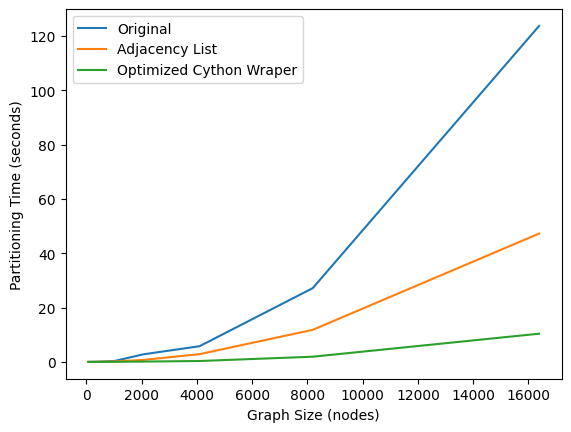

In [ ]:
plt.xlabel('Graph Size (nodes)')
plt.ylabel('Partitioning Time (seconds)')

plt.plot(sizes, orig_time, label="Original")
plt.plot(sizes, adjlist_time, label="Adjacency List")
plt.plot(sizes, optim_time, label="Optimized Cython Wraper")

plt.legend()
plt.show()

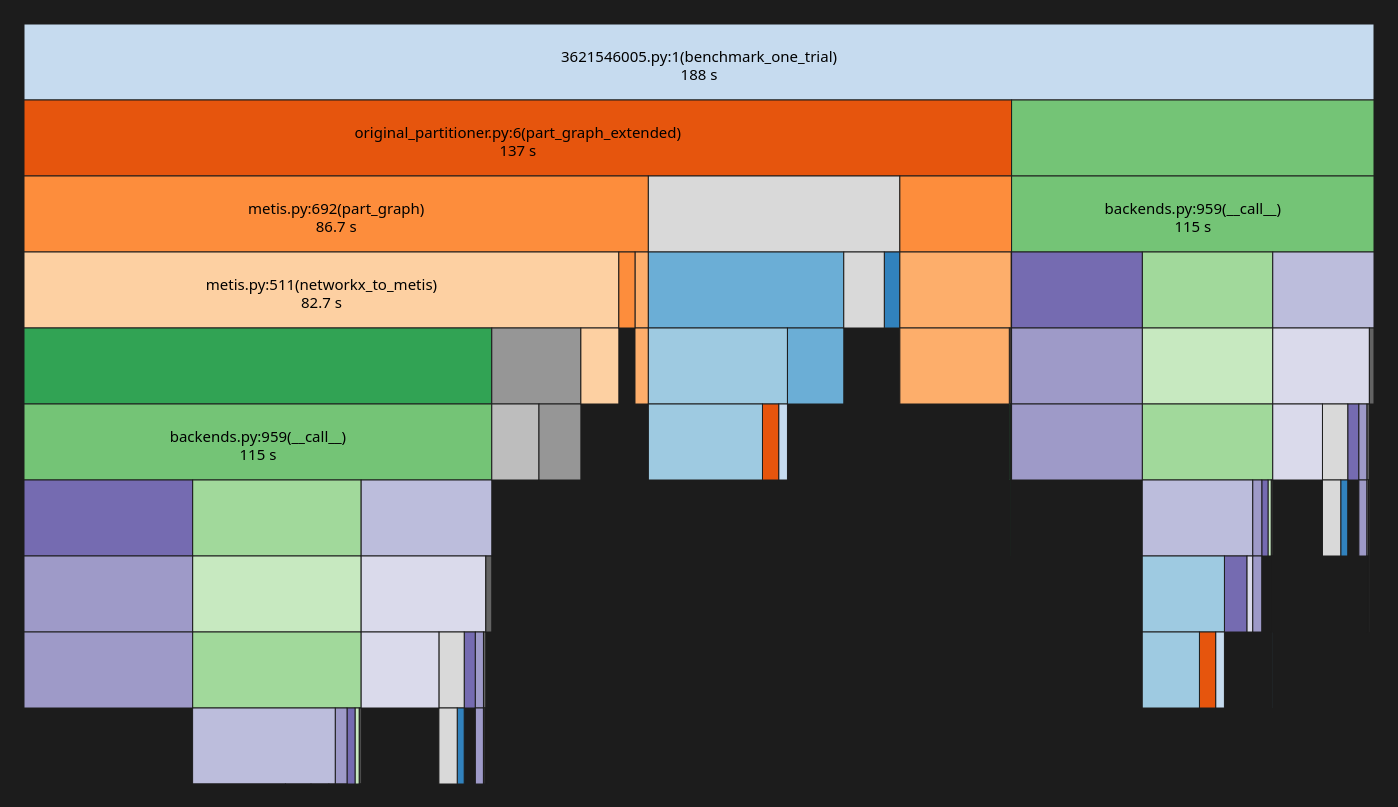